# **INF1721: Análise de Algoritmos  - Trabalho 3**

**Data de Entrega:** 18 de Junho 2022 <br>
**Professor:** Marcus Vinicius S. Poggi de Aragão <br>
**Alunos:**
*   Aiko Ramalho de Oliveira - 1820892
*   Isabella de Freitas Lima Aguiar Mariz - 1720511
*   João Roizen Fontana - 1710431
*   Pedro Antônio Tibau Velozo - 1812013


---


## **1. Problema do Fluxo Máximo**

<t> Considere um grafo orientado $G = (V,E)$ cujos arcos tem capacidade $u_{ij}, \forall (i,j) \in E$. Em seguida, considere dois vértices $s,t \in V$, denominados respectivamente como *source* $s$ (origem) e *sink* $t$ (destino). 

<t> O **Valor de Fluxo em Rede** $f$ em um grafo $G$ eh qualquer atribuição de valores à todos os $m = |E|$ arcos desse grafo:

$$ f = (f_1, f_2, f_3, ..., f_m) $$

<t> Para a análise do problema de fluxo máximo, serão consideradas as seguintes restrições:

1. Deve passar apenas um tipo de informação pelo fluxo $f$.

2. **Restrição de Capacidade -** associado a um arco $(i,j)$, existe um fluxo $f_{ij}$ tal que:
$$0 \leq f_{ij} \leq u_{ij}$$

3. **Conservação de Fluxo -** para que o fluxo $f$ seja viável, deve haver uma conservação de fluxo em *todos* os vértices $v \in V$, ou seja, a soma dos fluxos que entram em $v$ deve ser igual a soma dos fluxos que saem de $v$:
$$\sum_{e \in δ^-(v)} f_e = \sum_{e \in δ^+(v)} f_e$$

<t> O **Problema de Fluxo Máximo** consiste em encontrar um fluxo por onde passa o máximo possivel entre $s$ e $t$, sem exceder a capacidade $u_{ij}$ de nenhum arco.

<t> A Figura a seguir demonstra um exemplo de grafo $G$, um fluxo viável $f$ para ele, e o seu fluxo máximo $f_{max}$:

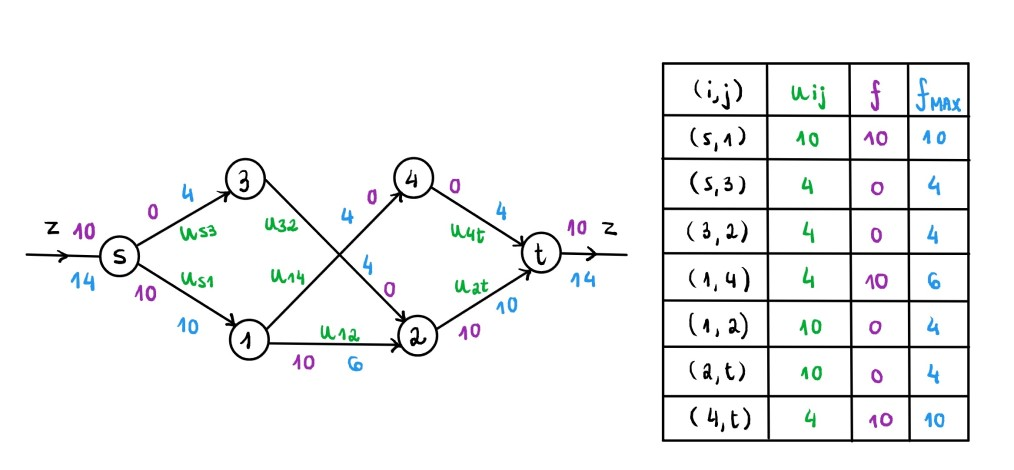

<t> Nota-se que o fluxo $f$ em roxo é um possível fluxo para $G$ que respeita as condições de restrição de capacidade e de conservação de fluxo, para todos os vértices do grafo. Porém, esse fluxo ainda pode ser maximizado sem violar as restrições, obtendo-se assim o fluxo $f_{max}$ em azul, o máximo para $G$.

### **1.1 - Algoritmos de Fluxo Máximo**

#### Condicoes de Otimalidade

<t> Para que se possa encontrar o fluxo máximo de um grafo $G$, são utilizados algoritmos que se baseiam em *condições de otimalidade* a fim de garantir suas corretudes e eficácia.

> **Definição 1 -** Um *corte s-t* é um conjunto $S$ tal que $s \in S$, $t \notin S$, e $S \subset V$. Como $s$ e $t$ tem que estar em conjuntos separados, a quantidade possível de subconjuntos $S$ é $2^{n-2}$.
$$ \delta(S) = \{ (i,j) \in E, i \in S, j \notin S, S \subset V \} $$

> **Definição 2 -** A soma das capacidades $U(S)$ de todos os arcos de saem (+) ou entram (-) em um corte $S$ é definida por:
$$ U(S) = \Sigma u_{ij}, \forall (i,j) \in \delta(S) $$

<t> Dessa maneira, a primeira condição de otimalidade é:

>  $I-$ O fluxo máximo $f_{max}$ (maior valor possível para $z$) é limitado pelo corte s-t de menor capacidade, conhecido como corte de capacidade mínima.
$$ \forall S \subset V , z \leq \sum_{e \in \delta^+(S)} f_e \leq \sum_{e \in \delta^+(S)} u_e = U^+(S) $$

<t> Já a segunda condição de otimalidade é dada por:

>  $II-$ Dado um fluxo $f'$, este é máximo se existe um corte cuja capacidade é igual ao valor do fluxo $f'$,  
$$ |f'| = z = \sum_{e \in \delta^+(s)} f_e = \sum_{e \in \delta^-(t)} f_e$$ também conhecido como *Teorema do Fluxo Máximo-Corte Mínimo* - dado um corte, este é mínimo se existe um fluxo $f'$ tal que $|f'|$ é igual à capacidade do corte.

#### Rede Residual

<t> Em seguida, antes que se possa discutir o funcionamento dos algoritmos, eh preciso entender o conceito de *Rede Residual*.

<t> Existem grafos que possuem *blocking flows* - caminhos que bloqueiam a passagem do fluxo -, e para soluciona-los, sao utilizadas as redes residuais.

> 

<t> Por fim, tendo sido definido o escopo do problema de fluxo máximo, é possível discutir os algoritmos a serem utilizados para encontrar esse fluxo: o **Edmonds-Karp** e o **Preflow-Push** (com três variações: o genérico, o FIFO e o highest label).

### **1.2 - Algoritmo de Edmonds-Karp**

O algoritmo de Ed-Karp é uma variação do algoritmo de Ford Fulkerson que fixa busca em largura para achar os caminhos aumentados. A complexidade é dada independente do fluxo máximo. O algoritmo roda em O(V*E^2)

A intuição é que toda vez que achamos um caminho aumentado um dos vértices torna-se saturado, e a distância do vértice para S será maior se ele aparecer de novo no caminho aumentado. O tamanho dos caminhos simples é limitado por V.

### **1.3 - Algoritmo Preflow-Push**


#### **1.3.1 - FIFO Selection Rule**
inserir uma breve descrição dele aqui

#### **1.3.2 - Highest Label Selection Rule**
inserir uma breve descrição dele aqui

# **2. Implementação**

Função auxiliar para ler os arquivos

In [1]:
import time
import matplotlib.pyplot as plt

In [2]:
# Read Instance
def graph_read(file_name):
    global n, m, v_min, v_max, arc_i, arc_j, cap_u, listAdjP, listAdjN, s, t

    f = open(file_name, 'r+')

    arc_i = {}
    arc_j = {}
    cap_u = {}

    infty_cost = 1.0
    v_min = 100000000
    v_max = 0
    a = 0
    row = 0
    for line in f.readlines():
        item_data = line.split()
        if (row >= 4):
            r = row
            a += 1
            i = int(item_data[0])
            arc_i[a] = i
            j = int(item_data[1])
            arc_j[a] = j
            x = float(item_data[2])
            xx = int(x * 10000)

            cap_u[a] = xx

            # print a, i,j, item_data[2], x, xx, cap_u[a]

            if v_min > min(i, j):
                v_min = min(i, j)
            if v_max < max(i, j):
                v_max = max(i, j)
            # print r, i, j, x
        else:
            if row == 0:
                n = int(item_data[0])
            if row == 1:
                m = int(item_data[0])
            if row == 2:
                s = int(item_data[0])
            if row == 3:
                t = int(item_data[0])
        row += 1
    f.close()

    print(" n m s t row v_min v_max ", n, m, s, t, row, v_min, v_max)

    # Cria Listas de Adjacencia Positiva e Negativa
    listAdjP = {}
    listAdjN = {}
    for i in range(v_min, v_max+1):
        listAdjP[i] = []
        listAdjN[i] = []

    for l in range(1, m+1):
        listAdjP[arc_i[l]].append(arc_j[l])
        listAdjN[arc_j[l]].append(arc_i[l])


### **2.1 - Algoritmo de Edmonds-Karp**

In [3]:
# Find path from s to t in the residual network - Or show there's none.

# Busca em Largura - BFS -

def bfs_resNet():
    global n, m, v_min, v_max, arc_i, arc_j, dist, listAdjP, listAdjN
    global ij2arc, s, t, cap_u, pred, f

    pred = {}
    d_visit = {}
    for i in range(v_min, v_max+1):
        d_visit[i] = -1
        pred[i] = -1

    q = []
    q.append(s)
    d_visit[s] = 0
    pred[s] = v_max+1

    cont1 = 0

    while len(q) > 0:
        # print q

        v = q[0]
        q.remove(q[0])

        for w in listAdjP[v]:
            cont1 += 1
            # print cont1," | (", v,w,")"
            a = ij2arc[v, w]
            if d_visit[w] == -1 and (cap_u[a] - f[a]) > 0:
                d_visit[w] = d_visit[v] + 1
                pred[w] = v
                if w == t:
                    return True
                q.append(w)
                #print("       v:", w," dist: ", d_visit[w])

        for w in listAdjN[v]:
            cont1 += 1
            # print cont1," | (", w,v,") inv "
            a = ij2arc[w, v]
            if d_visit[w] == -1 and f[a] > 0:
                d_visit[w] = d_visit[v] + 1
                pred[w] = -v
                if w == t:
                    return True
                q.append(w)
                #print("       v:", w," dist: ", d_visit[w])

    return False


In [4]:
# Edmonds Karp Alg for Max-Flow

def EK_MaxFlow():
    global n, m, v_min, v_max, arc_i, arc_j, dist, listAdjP, listAdjN
    global ij2arc, s, t, cap_u, pred, f, print_iters

    k = 0
    # gener_graph_flow()

    # print(" s, t ", s, t)
    # Flow Var
    f = {}
    path = {}

    max_cap = 0
    for a in range(1, m+1):
        f[a] = 0
        if max_cap < cap_u[a]:
            max_cap = cap_u[a]

    ij2arc = {}
    for a in range(1, m+1):
        ij2arc[arc_i[a], arc_j[a]] = a

    total_flow = 0
    itera = 0
    while bfs_resNet():
        # Get path and compute delta
        itera += 1
        # print  " iter pred ", itera, pred
        k = 0
        v_curr = t
        delta = max_cap
        while pred[v_curr] != v_max + 1:
            v_next = pred[v_curr]
            if v_next > 0:
                a = ij2arc[v_next, v_curr]
                path[k] = a
                if delta > cap_u[a] - f[a]:
                    delta = cap_u[a] - f[a]
            else:
                v_next = -v_next
                a = ij2arc[v_curr, v_next]
                path[k] = -a
                if delta > f[a]:
                    delta = f[a]

            v_curr = v_next
            k += 1

        total_flow += delta
        if print_iters:
            print(" Iteration: ", itera, " Delta:", delta, k, total_flow)
        # Update Flow
        for qq in range(k):
            a = path[qq]
            if a > 0:
                # print(" ", arc_i[a], "->", arc_j[a], " ")
                f[a] += delta
            else:
                # print(" ", arc_j[-a], "->", arc_i[-a], " ")
                f[-a] -= delta

    # print(" Total Flow: ", total_flow, " Number of Iterations: ",
    #       itera, " Lenght of last augmenting path: ", k)


### **2.2 - Algoritmo Preflow-Push**

In [5]:
def PR_bfs_init():
    global n, m, v_min, v_max, arc_i, arc_j, dist, listAdjP, listAdjN
    global ij2arc, s, t, cap_u, pred, f, print_iters, d_visit

    d_visit = {}
    for i in range(v_min, v_max+1):
        d_visit[i] = -1

    q = []
    q.append(t)
    d_visit[t] = 0

    cont1 = 0

    while len(q) > 0:
        # print q

        v = q[0]
        q.remove(q[0])

        for w in listAdjN[v]:
            cont1 += 1
            # print cont1," | (", w,v,") inv "
            if d_visit[w] == -1:
                d_visit[w] = d_visit[v] + 1
                q.append(w)


def PR_push_relabel(v):
    global n, m, v_min, v_max, arc_i, arc_j, dist, listAdjP, listAdjN, PR_total_flow, itera
    global ij2arc, s, t, cap_u, pred, f, print_iters, d_visit, excess, excess_list

    # Find Admissible Arc

    min_d = 2*n+1

    for w in listAdjP[v]:
        a = ij2arc[v, w]
        res_cap_a = cap_u[a] - f[a]

        if res_cap_a > 0:
            if d_visit[v] == d_visit[w]+1:
                # (v,w) is admissible
                # Push min excess(i) and res_cap_a
                if excess[v] < res_cap_a:
                    delta = excess[v]
                else:
                    delta = res_cap_a

                f[a] += delta
                excess[v] -= delta
                if excess[v] == 0 and v != s and v != t:
                    excess_list.remove(v)

                if excess[w] == 0 and w != s and w != t:
                    excess_list.insert(0, w)

                excess[w] += delta

                if w == t:
                    PR_total_flow += delta
                    # print "In PR_Push_Relabel Flow - Itera  ", PR_total_flow, itera
                return True

            # Keeps the minimum height of v neighbors in the residual network
            if min_d > d_visit[w]:
                min_d = d_visit[w]

    for w in listAdjN[v]:
        a = ij2arc[w, v]
        res_cap_a = f[a]

        if res_cap_a > 0:
            if d_visit[v] == d_visit[w]+1:
                # (w,v) is admissible - (v,w) reverse
                # Push min excess(i) and res_cap_a

                if excess[v] < res_cap_a:
                    delta = excess[v]
                else:
                    delta = res_cap_a

                f[a] -= delta
                excess[v] -= delta

                if excess[v] == 0 and v != s and v != t:
                    excess_list.remove(v)

                if excess[w] == 0 and w != s and w != t:
                    excess_list.insert(0, w)

                excess[w] += delta
                return True

            # Keeps the minimum height of v neighbors in the residual network
            if min_d > d_visit[w]:
                min_d = d_visit[w]

    # Relabel

    d_visit[v] = min_d + 1

    return False


def PR_MaxFlow():
    global n, m, v_min, v_max, arc_i, arc_j, dist, listAdjP, listAdjN, PR_total_flow, itera
    global ij2arc, s, t, cap_u, pred, f, print_iters, d_visit, excess, excess_list

    # print(" s, t ", s, t)
    # Flow Var
    f = {}
    PR_total_flow = 0

    # Pre-Process

    max_cap = 0
    for a in range(1, m+1):
        f[a] = 0
        if max_cap < cap_u[a]:
            max_cap = cap_u[a]

    ij2arc = {}
    for a in range(1, m+1):
        ij2arc[arc_i[a], arc_j[a]] = a

    # Compute Distances in edges from terminal to all other vertices

    PR_bfs_init()
    d_visit[s] = n

    # Init vertices excess

    excess = {}
    for v in range(v_min, v_max+1):
        excess[v] = 0

    # Start flow of arcs leaving s with their maximum capacity
    # Update excess

    excess_list = []

    excess[s] = 0
    for w in listAdjP[s]:
        a = ij2arc[s, w]
        f[a] = cap_u[a]
        excess[w] = cap_u[a]
        excess[s] -= cap_u[a]
        excess_list.insert(0, w)

    # while there are vertices with excess (except t), i.e.: Active Nodes

    itera = 0
    while len(excess_list) > 0:
        itera += 1
        # print("\n iter: ", itera)
        # print(" List: ", excess_list)
        # print(" Dist ", d_visit)
        # print(" Excess ", excess)
        # print(" Flow ", f)
        # print(" cap  ", cap_u)

        #pp = input()

        v = excess_list[0]
        PR_push_relabel(v)

    # print("\n iter: ", itera)
    # print(" List: ", excess_list)
    # print(" Dist ", d_visit)
    # print(" Excess ", excess)
    # print(" Flow ", f)
    # print(" cap  ", cap_u)

    # print " Total Flow: ", total_flow," Number of Iterations: ", itera
    # print("In PR_MaxFlow  -  Total Flow:",
    #       PR_total_flow, " Total Iterations:", itera)


# 3. Análise Experimental

In [6]:
numero_de_vertices = [
    96, 160, 200, 500, 640
    # 96, 160, 200, 500, 640, 960, 1440, 2560
]


In [7]:
tempos_cpu_edmond_karp = []
tempos_cpu_preflow_flush = []
# tempos_teoricos = []

for num_vertices in numero_de_vertices:
    file = f"maxflow-instances-zuse88/elist{num_vertices}d.rmf"
    graph_read(file)

    # complexidade_teorica = n*(m*m)
    # tempos_teoricos.append(complexidade_teorica)

    time_start = time.time()
    print_iters = False
    EK_MaxFlow()
    time_end = time.time()
    tempos_cpu_edmond_karp.append(time_end - time_start)

    time_start = time.time()
    print_iters = False
    PR_MaxFlow()
    time_end = time.time()
    tempos_cpu_preflow_flush.append(time_end - time_start)


 n m s t row v_min v_max  96 528 1 96 532 1 96
 n m s t row v_min v_max  160 912 1 160 916 1 160
 n m s t row v_min v_max  200 1340 1 200 1344 1 200
 n m s t row v_min v_max  500 3975 1 500 3979 1 500
 n m s t row v_min v_max  640 12608 1 640 12612 1 640


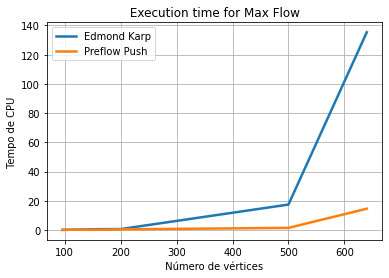

In [8]:
plt.plot(numero_de_vertices, tempos_cpu_edmond_karp, label='Edmond Karp', linewidth=2.5)
plt.plot(numero_de_vertices, tempos_cpu_preflow_flush, label='Preflow Push', linewidth=2.5)

plt.title(" Execution time for Max Flow ")
plt.ylabel(" Tempo de CPU ")
plt.xlabel(" Número de vértices ")

plt.grid()
plt.legend()
plt.show()